# ECOMMERCE (Website vs. App)
An Ecommerce company that sells clothing online but they also have in-store style and clothing advice sessions. Customers come in to the store, have sessions/meetings with a personal stylist, then they can go home and order either on a mobile app or website for the clothes they want.

**The company is trying to decide whether to focus their efforts on their mobile app experience or their website.**

## Imports
** Import pandas, numpy, matplotlib,and seaborn. **

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

## Get the Data

We'll work with the Ecommerce Customers csv file from the company. It has Customer info, suchas Email, Address, and their color Avatar. Then it also has numerical value columns:

* Avg. Session Length: Average session of in-store style advice sessions.
* Time on App: Average time spent on App in minutes
* Time on Website: Average time spent on Website in minutes
* Length of Membership: How many years the customer has been a member. 

** Read in the Ecommerce Customers csv file as a DataFrame called df.**

In [2]:
df = pd.read_csv("Ecommerce Customers")

In [3]:
df.head()

,Email,Address,Avatar,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
0,mstephenson@fernandez.com,"835 Frank Tunnel\nWrightmouth, MI 82180-9605",Violet,34.497268,12.655651,39.577668,4.082621,587.951054
1,hduke@hotmail.com,"4547 Archer Common\nDiazchester, CA 06566-8576",DarkGreen,31.926272,11.109461,37.268959,2.664034,392.204933
2,pallen@yahoo.com,"24645 Valerie Unions Suite 582\nCobbborough, D...",Bisque,33.000915,11.330278,37.110597,4.104543,487.547505
3,riverarebecca@gmail.com,"1414 David Throughway\nPort Jason, OH 22070-1220",SaddleBrown,34.305557,13.717514,36.721283,3.120179,581.852344
4,mstephens@davidson-herman.com,"14023 Rodriguez Passage\nPort Jacobville, PR 3...",MediumAquaMarine,33.330673,12.795189,37.536653,4.446308,599.406092


In [5]:
df.describe()

,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
count,500.000000,500.000000,500.000000,500.000000,500.000000
mean,33.053194,12.052488,37.060445,3.533462,499.314038
std,0.992563,0.994216,1.010489,0.999278,79.314782
min,29.532429,8.508152,33.913847,0.269901,256.670582
25%,32.341822,11.388153,36.349257,2.930450,445.038277
50%,33.082008,11.983231,37.069367,3.533975,498.887875
75%,33.711985,12.753850,37.716432,4.126502,549.313828
max,36.139662,15.126994,40.005182,6.922689,765.518462


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
Email                   500 non-null object
Address                 500 non-null object
Avatar                  500 non-null object
Avg. Session Length     500 non-null float64
Time on App             500 non-null float64
Time on Website         500 non-null float64
Length of Membership    500 non-null float64
Yearly Amount Spent     500 non-null float64
dtypes: float64(5), object(3)
memory usage: 31.3+ KB


## Cheking the missing values in DataFrame

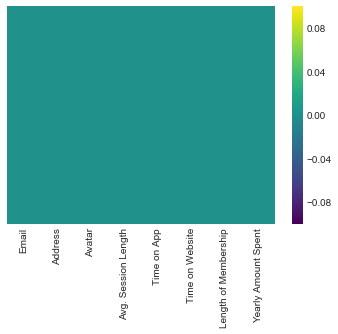

In [35]:
sns.heatmap(df.isnull(),cmap="viridis",yticklabels=False)

No Missing Value Found

## Exploratory Data Analysis
**Using seaborn to create a jointplot to compare the Time on Website and Yearly Amount Spent columns to see if the correlation make any sense**

In [10]:
sns.set_style("whitegrid")

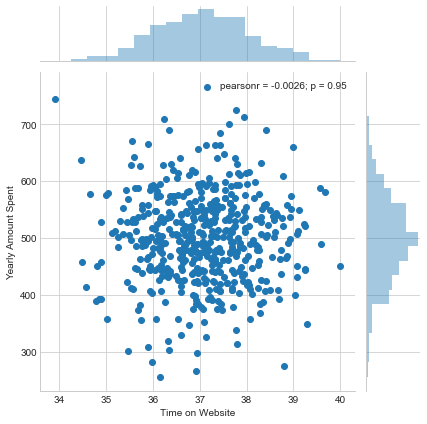

In [11]:
sns.jointplot(x="Time on Website",y="Yearly Amount Spent",data=df)

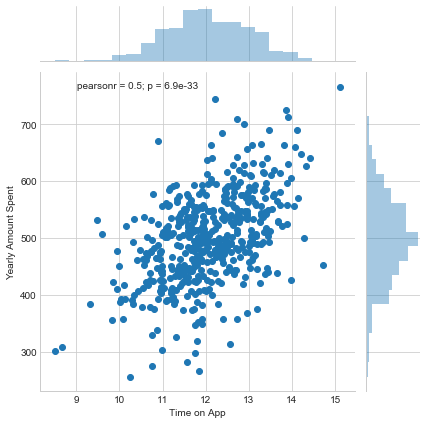

In [12]:
sns.jointplot(x="Time on App",y="Yearly Amount Spent",data=df)

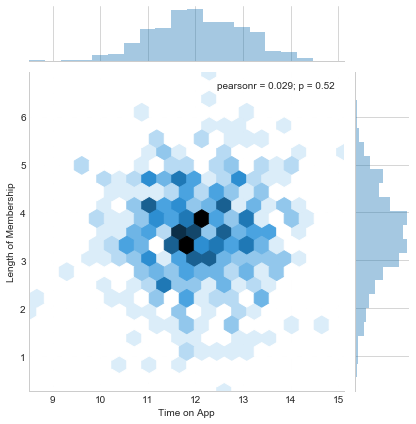

In [13]:
sns.jointplot(x="Time on App",y="Length of Membership",kind="hex",data=df)

**Exploring the types of relationships across the entire data set.**

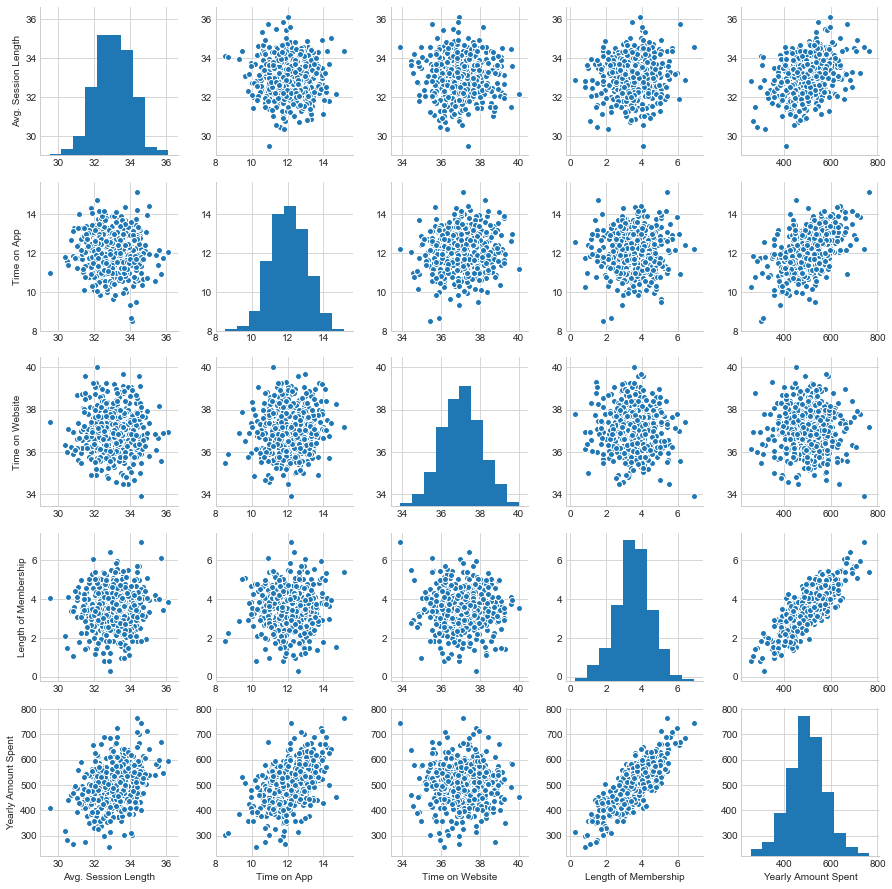

In [14]:
sns.pairplot(df)

**Based off this plot what looks to be the most correlated feature with Yearly Amount Spent is Length of Membership**


 We can also observe that by ploting a heatmap between the features of the DataFrame

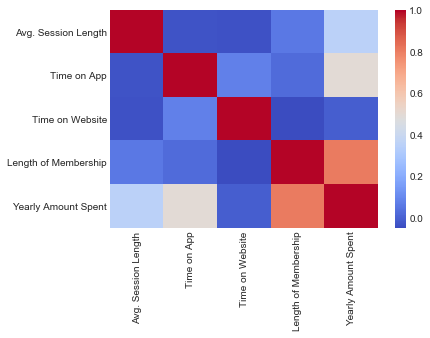

In [15]:
sns.heatmap(df.corr(),cmap="coolwarm")

**Creating a linear model plot (using seaborn's lmplot) of Yearly Amount Spent vs. Length of Membership**

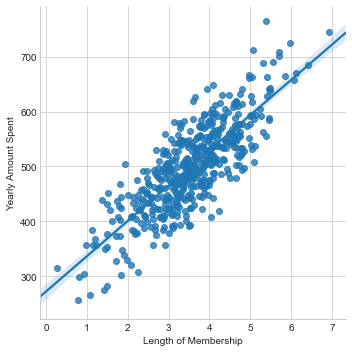

In [16]:
sns.lmplot(x='Length of Membership',y='Yearly Amount Spent',data=df)

## Training and Testing Data

Spliting the data into training and testing sets.
** Set a variable X equal to the numerical features of the customers and a variable y equal to the "Yearly Amount Spent" column. **

In [17]:
df.columns

Index(['Email', 'Address', 'Avatar', 'Avg. Session Length', 'Time on App',
       'Time on Website', 'Length of Membership', 'Yearly Amount Spent'],
      dtype='object')

In [18]:
X = df[['Avg. Session Length', 'Time on App',
       'Time on Website', 'Length of Membership']]
y = df['Yearly Amount Spent']

## Training the Model

In [23]:
from sklearn.cross_validation import train_test_split

In [20]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.4)

In [21]:
from sklearn.linear_model import LinearRegression

In [22]:
lm=LinearRegression()

**Train/Fit the training data set**

In [24]:
lm.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

**Coefficients of the model**

In [25]:
print('Coefficients :\n', lm.coef_)

Coefficients :
 [ 25.66178581  38.59145451   0.75810198  61.21535658]


## Predicting Test Data



In [26]:
predictions = lm.predict(X_test)

** Creating a scatterplot of the real test values versus the predicted values. **

Text(0,0.5,'predicted y')

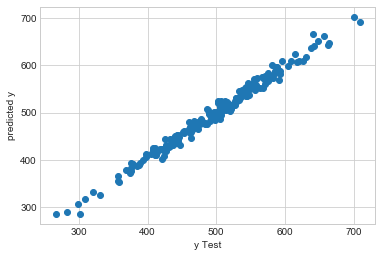

In [27]:
plt.scatter(y_test,predictions)
plt.xlabel('y Test')
plt.ylabel('predicted y')

## Evaluating the Model

** Calculating the Mean Absolute Error, Mean Squared Error, and the Root Mean Squared Error.**

In [28]:
from sklearn import metrics

In [29]:
print('MAE:', metrics.mean_absolute_error(y_test, predictions))
print('MSE:', metrics.mean_squared_error(y_test, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))

MAE: 7.58600634064
MSE: 88.8368742025
RMSE: 9.42533151685


## Residuals

we should have gotten a very good model with a good fit. Exploring the residuals to make sure everything is okay with our data. 


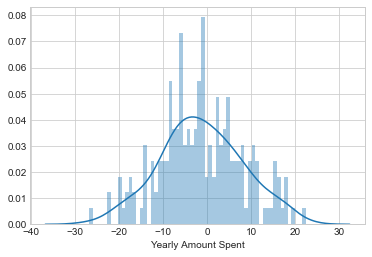

In [30]:
sns.distplot((y_test-predictions),bins=60)

## Conclusion
We still want to figure out the answer to the original question, do we focus our effort on mobile app or website development? Or maybe that doesn't even really matter, and Membership Time is what is really important.  Let's try to  interpret the coefficients to get an idea.

In [31]:
coefficients=pd.DataFrame(lm.coef_,X.columns)
coefficients.columns=['coefficient']
coefficients

,coefficient
Avg. Session Length,25.661786
Time on App,38.591455
Time on Website,0.758102
Length of Membership,61.215357


Interpreting the coefficients:

- Holding all other features fixed, a 1 unit increase in **Avg. Session Length** is associated with an **increase of 25.66 total dollars spent**.
- Holding all other features fixed, a 1 unit increase in **Time on App** is associated with an **increase of 38.59 total dollars spent**.
- Holding all other features fixed, a 1 unit increase in **Time on Website** is associated with an **increase of 0.75 total dollars spent**.
- Holding all other features fixed, a 1 unit increase in **Length of Membership** is associated with an **increase of 61.21 total dollars spent**.

**In which company should focus more -- Mobile app   or     Website?**

This is tricky, there are two ways to think about this: Develop the Website to catch up to the performance of the mobile app, or develop the app more since the **Mobile App** is working better. The answer really depends on the other factors going on at the company, We would have to explore the relationship between Length of Membership and the App or the Website before coming to a more concrete conclusion!